<center>
    <font size="5"> Zaawansowane Metody Uczenia Sztucznej Inteligencji<br/>
        <small><em>Studia stacjonarne II stopnia 2024/2025</em><br/>Kierunek: Informatyka</small>
    </font>
</center>
<br>

# Laboratorium nr 1.3: Sztuczne Sieci Neuronowe - wprowadzenie do bibliotek TensorFlow i Keras

### Sieci neuronowe w języku Python
Obecnie za sprawą rozwoju i popularności tzw. głębokich sieci neuronowych (Deep Neural Network) dostępnych jest bardzo dużo bibliotek/frameworków do budowy i uczenia sieci neuronowych (TensorFlow, Theano, Spark MLlib, MXNet, Microsoft Cognitive Toolkit, Caffe itp.). Z wielu z nich można korzystać w prosty sposób przy wykorzystaniu języka Python.

### Biblioteka [TensorFlow](https://www.tensorflow.org/)
TensorFlow – otwartoźródłowa biblioteka programistyczna napisana przez Google Brain Team. Wykorzystywana w uczeniu maszynowym i głębokich sieciach neuronowych. Biblioteka może do działania wykorzystywać zarówno karty graficzne, procesory (m.in. dla urządzeń mobilnych oraz systemów wbudowanych), jak i wyspecjalizowane mikroprocesory nazywane akceleratorami AI – tensor processing unit. Biblioteka składa się z kilku modułów. W jej najniższej warstwie znajduje się rozproszony silnik wykonawczy (ang. distributed execution engine), który w celu podniesienia wydajności został zaimplementowany w języku programowania C++. Nad nią znajdują się frontendy napisane w kilku językach programowania m.in. w Pythonie oraz C++. Powyżej umieszczona została warstwa API, która zapewnia prostszy interfejs dla powszechnie używanych warstw w modelach głębokiego uczenia. Na następną warstwę składają się wysokopoziomowe API, m.in. Keras oraz Estimator API, które ułatwiają tworzenie modeli i ich ocenę. Ponad tym znajdują się przygotowane przez twórców biblioteki gotowe do użycia modele. [Wikipedia](https://pl.wikipedia.org/wiki/TensorFlow)

### Biblioteka [Keras](https://keras.io/)
Keras jest wysokopoziomową nakładką na biblioteki takie jak TensorFlow, CNTK (Microsoft Cognitive Toolkit) lub Theano napisaną w języku Python. Domyślnie wykorzystywanym backendem jest TensorFlow i z takiego będziemy korzystać.  

Biblioteka ta pozwala na:
*   Łatwe i szybkie prototypowanie modeli (pełna modularność).
*   Wspiera zarówno "klasyczne" sieci neuronowe jak i konwolucyjne czy rekurencyjne.
*   Umożliwia uczenie przy wykorzystaniu CPU oraz GPU.

Aktualnie biblioteka Keras dostępna jest również jako podmoduł biblioteki TensorFlow.  

### Import bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print('Numpy version:', np.__version__)
print('Tensorflow version:', tf.__version__)

Numpy version: 1.26.4
Tensorflow version: 2.17.0


### Graf obliczeniowy
Biblioteka Tensorflow reprezentuje obliczenia za pomocą grafów (drzew)obliczeniowych, gdzie w węzłach terminalnych (liściach) znajdują się dane (tensory) a w pozostałych węzłach operacje matematyczne.

Prosty przykład:

![graph](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/graph.PNG)

In [ ]:
# dane wejściowe
a = tf.constant(15, name="a")
b = tf.constant(61, name="b")

# dodawanie
c = tf.add(a, b, name="c")
c

TensorFlow nie wykonuje obliczeń od razu, tworzy graf, który należy później wykonań. W tym celu w wersji 1.x należało zainicjować wszystkie zmienne i uruchomić sesję. W wersji 2.x jest dużo prościej.

In [ ]:
c.numpy()

#### Ćwiczenie 1: Perceptron
Stwórz model perceptronu z wykorzystaniem biblioteki TensorFlow.

![perceptron](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/neuron2.PNG)![eq](http://torus.uck.pk.edu.pl/~amarsz/images/zmum/n2eq2.PNG)

In [ ]:
n_in = 2 # liczba sygnałów wejściowych
W = tf.Variable(tf.ones((n_in, 1)))  #tf.random_uniform()
b = tf.Variable(tf.zeros((1, 1)))

def perceptron(x, W, b):
  pass

In [ ]:
x_input = tf.constant([[1, 2.]], shape=(1,2))
model = perceptron(x_input, W, b)
y_out = model.numpy()
print(y_out)

### Sieć wielowarstwowa z wykorzystanie biblioteki Keras

In [5]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
mlp = Sequential()
mlp.add(Dense(1, activation='sigmoid', kernel_initializer='ones', input_shape=(2,)))
mlp.add(Dense(1, activation='sigmoid', kernel_initializer='ones'))

In [ ]:
mlp.summary()

Prosty przykład (Perceptron)

In [ ]:
def mlp(n_in, n_out):
    x = Input(shape=(n_in,))
    y = Dense(n_out, activation='sigmoid', kernel_initializer='ones')(x)
    return Model(inputs=x, outputs=y)
model = mlp(2, 1)
model.summary()

In [ ]:
x_input = tf.constant([[1, 2.]], shape=(1,2))

In [ ]:
y_out = model.predict(x_input)
print(y_out)

### Ćwiczenie 2: Zamodeluj i wytrenuj sieć dla problemu XOR


In [ ]:
xx = np.array([[-1, -1], [1, -1], [-1,1], [1,1]])
d = np.array([-1,1,1,-1])

def mlp():
    pass
model = mlp()
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:

model.fit(xx, d, epochs=1000, batch_size=4, verbose=1)
pred = model.predict(xx)

In [ ]:
model.predict(xx)

### Przykład trenowania sieci - Aproksymacja funkcji

#### Przygotowanie danych

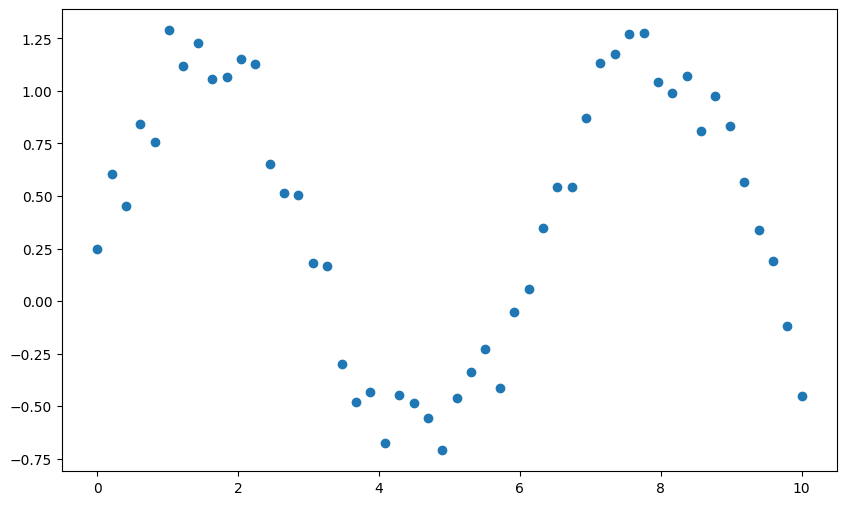

In [2]:
data_x = np.linspace(0, 10, 50)
data_y = np.sin(data_x) + np.random.random(data_x.shape[0])*0.5
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data_x, data_y, 'o')
plt.show()

#### Podział na dane uczące i walidacyjne.

Dane walidacyjne służą do monitorowania procesu uczenia, sprawdzania jak sieć radzi sobie z danymi, które nie są wykorzystywane do modyfikacji wag.

Jeśli błąd na danych uczących maleje, a na danych walidacyjnych już nie (lub wręcz rośnie), jest to potencjalny sygnał, że sieć jest przeczuczona.

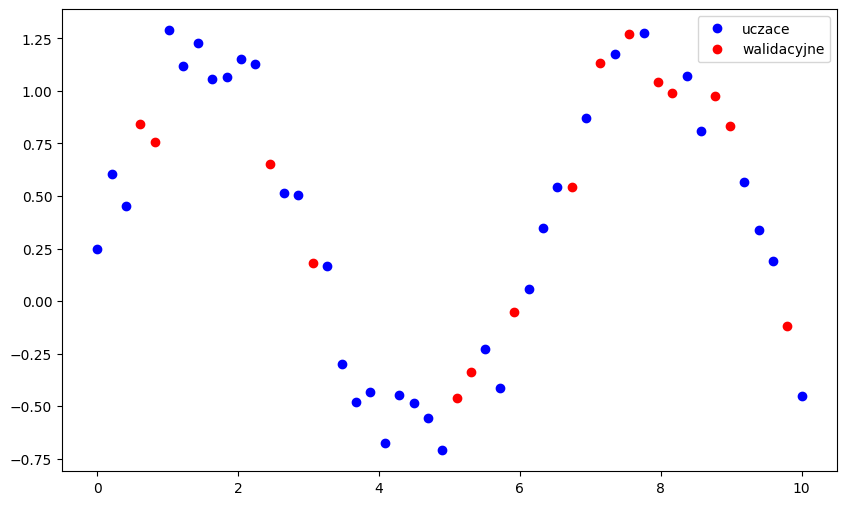

In [3]:
temp = np.arange(50)
np.random.shuffle(temp)
val_x = data_x[temp[35:]]
val_y = data_y[temp[35:]]
data_x = data_x[temp[:35]]
data_y = data_y[temp[:35]]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data_x, data_y, 'bo', label='uczace')
ax.plot(val_x, val_y, 'ro', label='walidacyjne')
ax.legend()
plt.show()

#### Mała sieć, 35 neuronów w jednej warstwie ukrytej.

In [6]:
def mlp(n_in, n_h):
    x = Input(shape=(n_in,))
    h = Dense(n_h, activation='tanh')(x)
    y = Dense(1, activation='linear')(h)
    return Model(inputs=x, outputs=y)

model1 = mlp(1, 35)
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 35)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106 (424.00 B)

 Trainable params: 106 (424.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model1.compile(loss='mse', optimizer='rmsprop')
hist = model1.fit(data_x, data_y, epochs=100, verbose=1, batch_size=35, validation_data=(val_x, val_y))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step - loss: 0.4986 - val_loss: 0.4123
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.4898 - val_loss: 0.3610
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.4822 - val_loss: 0.3886
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4755 - val_loss: 0.3751
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4708 - val_loss: 0.3813
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4667 - val_loss: 0.3777
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4630 - val_loss: 0.3795
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4596 - val_loss: 0.3777
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.4564 - val_loss: 0.3784
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4533 - val_loss: 0.3771
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4504 - val_loss: 0.3774
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4476 - va

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


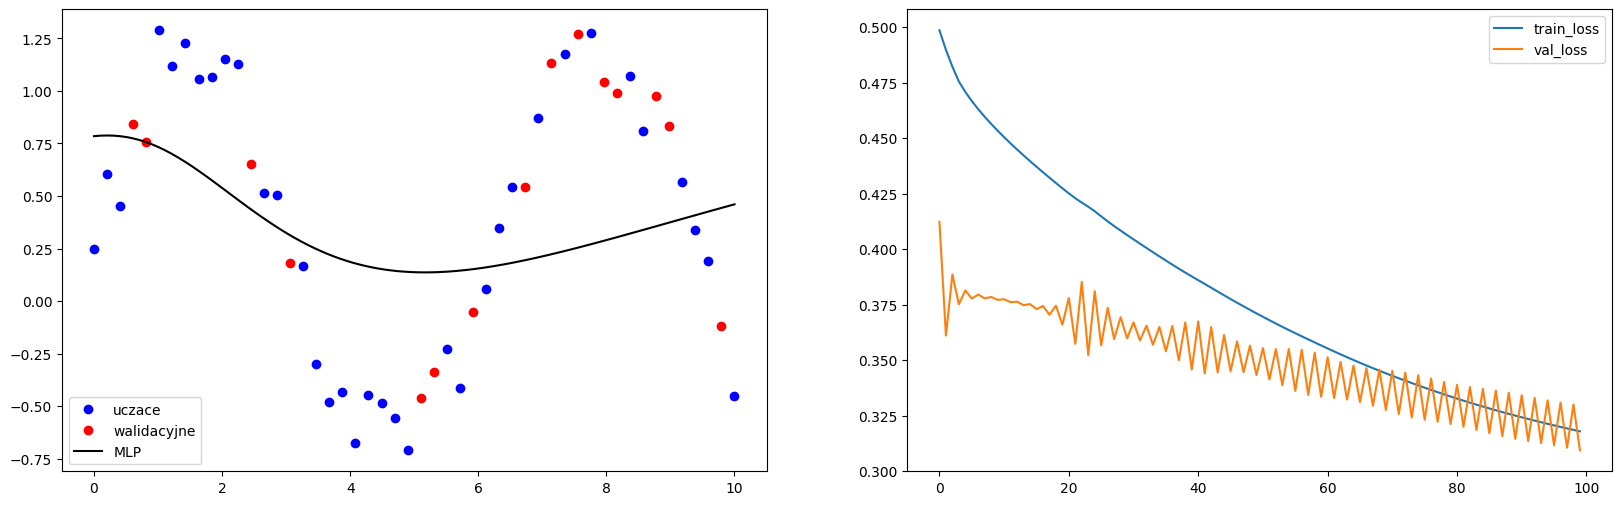

In [8]:
data_xx = np.linspace(0, 10, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(data_x, data_y, 'bo', label='uczace')
ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
pred = model1.predict(data_xx)
ax1.plot(data_xx, pred, 'k-', label='MLP')
ax1.legend()
ax2.plot(hist.history['loss'], label='train_loss')
ax2.plot(hist.history['val_loss'], label='val_loss')
ax2.legend()
plt.show()

In [10]:
import io
import time
import base64
import IPython

model = model1
#model.reset_states()

def fig2b64(f):
  data = io.BytesIO()
  f.savefig(data, format='png')
  data.seek(0)
  return base64.b64encode(data.read()).decode()

train_loss = []
val_loss = []

fig = plt.figure(num=1, clear=True, figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
train_loss.extend(hist.history['loss'])
val_loss.extend(hist.history['val_loss'])

pred = model.predict(data_xx)
ax1.clear()
ax2.clear()
ax1.plot(data_x, data_y, 'bo', label='uczace')
ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
ax1.plot(data_xx, pred, 'k-', label='MLP')
ax1.legend()
ax2.plot(train_loss, label='train_loss')
ax2.plot(val_loss, label='val_loss')
ax2.legend()

data_str = fig2b64(fig)
IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)

for i in range(200):
  # time.sleep(1)
  hist = model.fit(data_x, data_y, epochs=20, verbose=0, batch_size=35, validation_data=(val_x, val_y))
  train_loss.extend(hist.history['loss'])
  val_loss.extend(hist.history['val_loss'])
  pred = model.predict(data_xx)
  ax1.clear()
  ax2.clear()
  ax1.plot(data_x, data_y, 'bo', label='uczace')
  ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
  ax1.plot(data_xx, pred, 'k-', label='MLP')
  ax1.legend()
  ax2.plot(train_loss, label='train_loss')
  ax2.plot(val_loss, label='val_loss')
  ax2.legend()
  data_str = fig2b64(fig)
  IPython.display.display_javascript(f'''document.querySelector('.myimage').src = 'data:image/png;base64,{data_str}';''', raw=True)

# suppress final output
plt.close(1)

Output hidden; open in https://colab.research.google.com to view.

#### Większa sieć, dwie warstwy ukryte.

In [11]:
from tensorflow.keras.layers import Dropout
def mlp2(n_in, n_h1, n_h2):
    x = Input(shape=(n_in,))
    h1 = Dense(n_h1, activation='tanh')(x)
    #h1 = Dropout(0.5)(h1)
    h2 = Dense(n_h2, activation='tanh')(h1)
    y = Dense(1, activation='linear')(h2)
    return Model(inputs=x, outputs=y)

model2 = mlp2(1, 500, 100)
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,201 (200.00 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model2.compile(loss='mse', optimizer='adam')

In [14]:
import io
import time
import base64
import IPython

model = model2
#model.reset_states()

def fig2b64(f):
  data = io.BytesIO()
  f.savefig(data, format='png')
  data.seek(0)
  return base64.b64encode(data.read()).decode()

train_loss = []
val_loss = []

fig = plt.figure(num=1, clear=True, figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
train_loss.extend(hist.history['loss'])
val_loss.extend(hist.history['val_loss'])

pred = model.predict(data_xx)
ax1.clear()
ax2.clear()
ax1.plot(data_x, data_y, 'bo', label='uczace')
ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
ax1.plot(data_xx, pred, 'k-', label='MLP')
ax1.legend()
ax2.plot(train_loss, label='train_loss')
ax2.plot(val_loss, label='val_loss')
ax2.legend()

data_str = fig2b64(fig)
IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)

for i in range(200):
  # time.sleep(1)
  hist = model.fit(data_x, data_y, epochs=20, verbose=0, batch_size=35, validation_data=(val_x, val_y))
  train_loss.extend(hist.history['loss'])
  val_loss.extend(hist.history['val_loss'])
  pred = model.predict(data_xx, verbose=0)
  ax1.clear()
  ax2.clear()
  ax1.plot(data_x, data_y, 'bo', label='uczace')
  ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
  ax1.plot(data_xx, pred, 'k-', label='MLP')
  ax1.legend()
  ax2.plot(train_loss, label='train_loss')
  ax2.plot(val_loss, label='val_loss')
  ax2.legend()
  data_str = fig2b64(fig)
  IPython.display.display_javascript(f'''document.querySelector('.myimage').src = 'data:image/png;base64,{data_str}';''', raw=True)

# suppress final output
plt.close(1)

Output hidden; open in https://colab.research.google.com to view.

### Ćwiczenie 3: Znajdź najlepszą architekturę sieci.